### Import the libraries 

Before we import the data, let's load the necessary libraries:

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn import metrics

# Classification models
from sklearn.tree import DecisionTreeClassifier, plot_tree # for decision tree models
from sklearn.ensemble import RandomForestClassifier # for Random Forest (ensemble) method
from sklearn.svm import SVC  # import SVM classifier
from sklearn.svm import LinearSVC # for a faster implementation of the linear SVM classifier - can also use SVC and kernel='linear'
from sklearn.neighbors import KNeighborsClassifier

%matplotlib inline

warnings.filterwarnings("ignore") 

### Data 

This dataset represents a set of possible advertisements on Internet pages. The dataset can be obtained from 
https://archive.ics.uci.edu/ml/datasets/Internet+Advertisements, which is the UCI data
repository. It can be addressed a supervised learning problem. The dataset is provided
to you in the zip file as “ad.data”.
The features encode:
- the geometry of the image (if available)
- phrases occuring in the URL
- the image's URL and alt text
- the anchor text,
- words occuring near the anchor text

**The task is to predict whether an image is an advertisement ("ad") or not ("nonad"). The aim is to classify based on the given features given the features mentioned**

#### Importing the data 

As with the previous Labs, we will start by loading the provided dataset "breast_cancer.csv" into a `DataFrame` named **"input_data"** using once more the function  `pd.read_csv()` (Check the pandas [read_csv() documentation](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) if needed). 
- To get acquainted with our data, let’s look at the first 5 entries using `head()`
- Check and print the dimensionality of the data using `shape`
- The dataset is provided in your Lab folder (no need to download it). 

In [4]:
# Note: header=None (!)
input_data = pd.read_csv('ad.data', header=None)
print(input_data.shape)

input_data.head()

(3279, 1559)


,0,1,2,3,4,5,6,7,8,9,...,1549,1550,1551,1552,1553,1554,1555,1556,1557,1558
0,125,125,1.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
1,57,468,8.2105,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
2,33,230,6.9696,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
3,60,468,7.8,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
4,60,468,7.8,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.


In [5]:
input_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3279 entries, 0 to 3278
Columns: 1559 entries, 0 to 1558
dtypes: int64(1554), object(5)
memory usage: 39.0+ MB


In [6]:
# replace ? in the raw data with the vale np.nan, which means not a number
#this denotes the missing values
input_data.replace(to_replace ='[ ]*\?', value = np.nan, regex = True, inplace=True)

#### Check for missing values 

In [7]:
input_data.isna().any()

0        True
1        True
2        True
3        True
4       False
        ...  
1554    False
1555    False
1556    False
1557    False
1558    False
Length: 1559, dtype: bool

In [8]:
missing = pd.DataFrame({'percent_missing': input_data.isnull().sum() * 100 / len(input_data)})
missing

,percent_missing
0,27.538884
1,27.477890
2,27.752364
3,0.457457
4,0.000000
...,...
1554,0.000000
1555,0.000000
1556,0.000000
1557,0.000000



### Split the data into input variable X and class vector y

Decision Trees and Random Forests follow a similar workflow to other supervised models in `sklearn`. We need to first start by setting the `X` matrix (input feature matrix) and `y` vector (class target):

In [9]:
class_var = 1558

X = input_data.drop(class_var, axis=1)
y = input_data[class_var]

In [10]:
print ("X dimensions: ", X.shape)
print ("y dimensions: ", y.shape)

X dimensions:  (3279, 1558)
y dimensions:  (3279,)


### Check the X data

In [11]:
X.describe()

,4,5,6,7,8,9,10,11,12,13,...,1548,1549,1550,1551,1552,1553,1554,1555,1556,1557
count,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,...,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000
mean,0.004270,0.011589,0.004575,0.003355,0.003965,0.011589,0.003355,0.004880,0.009149,0.004575,...,0.006099,0.004575,0.003660,0.002440,0.003050,0.006404,0.012809,0.013419,0.009759,0.001525
std,0.065212,0.107042,0.067491,0.057831,0.062850,0.107042,0.057831,0.069694,0.095227,0.067491,...,0.077872,0.067491,0.060393,0.049341,0.055148,0.079783,0.112466,0.115077,0.098320,0.039026
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Investigate the class frequencies

An important aspect to understand before applying any classification algorithm is how the output labels are distributed. Are they evenly distributed or not? Imbalances in distribution of labels can often lead to poor classification results for the minority class even if the classification results for the majority class are very good.

In [12]:
# count the number of adverisements and non-avertisements

y.value_counts()

nonad.    2820
ad.        459
Name: 1558, dtype: int64

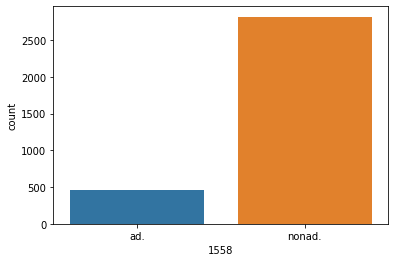

In [13]:
# Try to plot in a barplot using the sns.countplot() with 'data=input_data' and 
# 'x' equal to the feature that contains the target variable 

sns.countplot(x=class_var, data=input_data)
plt.show();

### Mapping (encoding) the categorical variable

In order for the class variable to be in machine-readable form and ready to be used by ML models, it needs to be encoded in a numerical format. `LabelEncoder` from `sklearn` can be used to encode target labels with value between `0` and `n_classes-1`. 

**This transformer should be used to encode target values, i.e. y, and not the input X** (in which case, we can use One Hot Encoding or other ways of encoding). Read more about [LabelEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html) and [Transforming the prediction variable(y)](https://scikit-learn.org/stable/modules/preprocessing_targets.html#preprocessing-targets)

In [14]:
# Convert the categorical values into numbers using the LabelEncoder from sklearn

# Instantiate a LabelEncoder() object and save it to a new variable "le"
le = LabelEncoder()

# Fit the label encoder "le" using fit_transform() on y (pass it as a parameter) 
# Assign back to "y". The fit_transform() function takes a categorical column 
# and converts/maps it to numerical values.
y = le.fit_transform(y)

In [15]:
# Check once more the distribution of the binary class 

pd.DataFrame(y).value_counts()

1    2820
0     459
dtype: int64

## Supervised Learning - Classification

For every classification model built with scikit-learn, we will follow four main steps:

1. Building the classification model (using either default, pre-defined or optimized parameters)
2. Training (*fitting*) the model
3. Testing (*predicting*) the model
4. Performance evaluation using various metrics.

### Train-Test Split

Training and testing a classification model on the same dataset is a methodological mistake: a model that would just repeat the labels of the samples that it has just seen would have a perfect score but would fail to predict anything useful on yet-unseen data (poor generalisation). To use different datasets for training and testing, we need to split our dataset into two disjoint sets: train and test (Holdout method).

Use `sklearn`’s `train_test_split()` function to randomly split the data into train and test sets (visit the [train_test_split documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) and the  [model cross-validation documentation](https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation)). 

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, 
                                                    stratify=y, random_state=0)

print('Shape of x_train and y_train: ', X_train.shape, y_train.shape)
print('Shape of x_test and y_test: ',   X_test.shape,  y_test.shape)

Shape of x_train and y_train:  (2295, 1558) (2295,)
Shape of x_test and y_test:  (984, 1558) (984,)


**Note: it’s good practice to split the train and test sets before doing any feature engineering and/or scaling to avoid data leakage.**


### Imputing: fill the NAs 

When inputting the missing values from the test set you should use always use the parameters estimated from the training set. Here is why: when training a machine learning model, you are using the training data to estimate the distribution of a population (where all the data you have come from). In this process, the correct use of the test set is to validate the generalization ability of your model when you get new unseen data. You should always use the values estimated with the training set because you are not supposed to see the test set until new data comes to you.


Using the values (mean/std) from the test set to impute the test set will bias the results of your model. Which will result in an optimistic version of how the model should perform. 

Reminder: 
- If missing values are numerical, fill with mean / median. If data distribution is normal use mean otherwise (skewed) median.
- If missing values are categorical then directly use mode.

In [17]:
# Instantiate the Imputer
imp = SimpleImputer(missing_values=np.nan, strategy='median')

# Fit the Imputer ONLY on the training data (and transform - this could be done using two separate steps/functions)
X_train = imp.fit_transform(X_train)
X_test  = imp.transform(X_test)

In [18]:
pd.DataFrame(X_train).isna().any()

0       False
1       False
2       False
3       False
4       False
        ...  
1553    False
1554    False
1555    False
1556    False
1557    False
Length: 1558, dtype: bool

### Scaling 

Decision Trees and Random Forests need little to no data pre-processing so we can skip the step of Scaling / Normalization for today's Lab, mainly to highlight the feature splits in the following `plot_tree` visualization.

In [19]:
# Instantiate the StandardScaler() or MinMaxScaler() from sklearn and store into a variable named "scaler" 
scaler = StandardScaler()

# Fit the scaler ONLY on the training data (and transform - this could be done using two separate steps/functions) 
X_train = scaler.fit_transform(X_train)

# Use the fitted scaler to transform the test data 
X_test  = scaler.transform(X_test)

## Classifiers 

### 1a) Default KNN Classifier

In [20]:
# Step 1 - Instantiate the KNeighborsClassifier() classifier using the default parameters 

knn = KNeighborsClassifier()

# Step 2 - Fit the knn model to the training set (use knn.fit())
# Pass as arguments the train matrix X_train and the class vec y_train 
# No need to assign it into a new variable

knn.fit(X_train, y_train)

# Step 3 - Predict the test data using the knn model (use knn.predict())
# Pass as argument only the test matrix X_test
# Save the prediction output into a new variable "y_pred"

y_pred = knn.predict(X_test)

# Step 4 - Print the final overall accuracy for the test set using metrics.accuracy_score()
# Pass as parameters the actual values from y_test and the predicted values from y_pred

print('Test set accuracy: ', metrics.accuracy_score(y_test, y_pred))

Test set accuracy:  0.959349593495935


In [21]:
# Print the confusion_matrix for the test set using metrics.confusion_matrix()
# Pass as parameters the actual values from y_test and the predicted values from y_pred

print(metrics.confusion_matrix(y_test, y_pred))

[[102  36]
 [  4 842]]


In [22]:
# Print the classification_report for the test set using metrics.classification_report()
# Pass as parameters the actual values from y_test and the predicted values from y_pred

print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.74      0.84       138
           1       0.96      1.00      0.98       846

    accuracy                           0.96       984
   macro avg       0.96      0.87      0.91       984
weighted avg       0.96      0.96      0.96       984



### 1b) Tuned KNN classifier 

In [25]:
# Create the dictionary of model hyperparameters
n_neighbors = np.arange(1, 51, 5)  
weights     = ['uniform', 'distance']
metric      = ['minkowski','euclidean','manhattan']

# Convert to dictionary
knn_param_grid = dict(n_neighbors = n_neighbors, 
                      weights = weights, 
                      metric = metric
                     )
knn_param_grid

# Grid search with 10-fold cross-validation using a dictionary of parameters
gridCV = GridSearchCV(KNeighborsClassifier(), 
                      knn_param_grid, 
                      cv=10)
gridCV.fit(X_train, y_train) 

# Report the optimal parameters using
print('Best Parameters using grid search: ', gridCV.best_params_)

Best Parameters using grid search:  {'metric': 'manhattan', 'n_neighbors': 6, 'weights': 'distance'}


In [48]:
# Build the classifier using the optimal parameters detected by grid search

knn_opt = gridCV.best_estimator_
knn_opt.fit(X_train, y_train)
y_pred = knn_opt.predict(X_test)

# Report the final overall accuracy
print('Test set accuracy: ',metrics.accuracy_score(y_test, y_pred))

Test set accuracy:  0.9603658536585366



### Decision Tree Classifier 

Decision Tree classifiers construct classification models in the form of a tree structure. A decision tree progressively splits the training set into smaller subsets. Each node of the tree represents a subset of the data. Once a new sample is presented to the data, it is classified according to the test condition generated for each node of the tree.

<!-- #### Decision Tree Classifier parameters
- `criterion`: The function to measure the quality of a split. Supported criteria are "gini" for the Gini impurity and "entropy" for the information gain.
- `splitter`: The strategy used to choose the split at each node. Supported strategies are "best" to choose the best split and "random" to choose the best random split.
- `max_depth`: The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
- `min_samples_split`: The minimum number of samples required to split an internal node.
- `min_samples_leaf`: The minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression.
- `min_weight_fraction_leaf`: The minimum weighted fraction of the sum total of weights (of all the input samples) required to be at a leaf node. Samples have equal weight when sample_weight is not provided.
- `max_features`: The number of features to consider when looking for the best split.
- `max_leaf_nodes`: Grow a tree with max_leaf_nodes in best-first fashion. Best nodes are defined as relative reduction in impurity. If None then unlimited number of leaf nodes.
- `min_impurity_decrease`: A node will be split if this split induces a decrease of the impurity greater than or equal to this value.
- `min_impurity_split`: Threshold for early stopping in tree growth. A node will split if its impurity is above the threshold, otherwise it is a leaf. -->

#### Decision Tree Classifier with default parameters

In [27]:
dt = DecisionTreeClassifier(random_state=0)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

print('Test set accuracy: ', metrics.accuracy_score(y_test, y_pred))

Test set accuracy:  0.9695121951219512


In [28]:
# Print the confusion_matrix for the test set using metrics.confusion_matrix()
# Pass as parameters the actual values from y_test and the predicted values from y_pred

print(metrics.confusion_matrix(y_test, y_pred))

[[119  19]
 [ 11 835]]


In [29]:
# Print the classification_report for the test set using metrics.classification_report()
# Pass as parameters the actual values from y_test and the predicted values from y_pred

print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.86      0.89       138
           1       0.98      0.99      0.98       846

    accuracy                           0.97       984
   macro avg       0.95      0.92      0.94       984
weighted avg       0.97      0.97      0.97       984



In [31]:
### you can tune the parameters of the DecisionTree here  
### but RFs (as follows) can be more powerful instead 
### DTs are notoriously prone to over-fitting 

### Random Forest Classifier

Random Forest is one of the most popular and most powerful machine learning algorithms. Random forest is a supervised learning algorithm that is used for classification and regression tasks. The "forest" is an **ensemble of decision trees** (each of which is based on a random subset of the data). The general idea of the bagging method is that a combination of learning models reduces the chance of overfitting. 

#### Random Forest Classifier with pre-defined parameters

In [32]:
# Step 1 - Instantiate the RandomForestClassifier() classifier using the default parameters

rf = RandomForestClassifier(random_state=0)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

#  Print the final overall accuracy for the test set using metrics.accuracy_score()
print('Test set accuracy: ', metrics.accuracy_score(y_test, y_pred))

Test set accuracy:  0.975609756097561


In [33]:
# Print the classification_report for the test set using metrics.classification_report()
# Pass as parameters the actual values from y_test and the predicted values from y_pred

print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.87      0.91       138
           1       0.98      0.99      0.99       846

    accuracy                           0.98       984
   macro avg       0.97      0.93      0.95       984
weighted avg       0.98      0.98      0.98       984



#### RF hyperparameter tuning



In [34]:
# Try RandomSearchCV() or GridSearchCV() (significantly slower) with 
# 5-fold or 10-fold cross-validation (cv=5 or cv=10)
# (more cv folds reduces the chances of overfitting but also increases the run time) 
# using a dictionary of parameters such as the ones defined as follows  

# Create the dictionary of hyperparameters 
param_grid = {'n_estimators': np.arange(10, 200, 10),
              'max_depth': [np.arange(1, 10, 2), None],
              'max_features' : ['sqrt', 'log2', None], 
#               'min_samples_split': [1, 3, 5, 10], 
#               'min_samples_leaf': [1, 3, 10],
#               'criterion': ['gini', 'entropy'], 
             }

# Set up the RandomSearchCV and assign to a new variable named cv_rf
# The most important arguments in RandomizedSearchCV are n_iter, 
# which controls the number of different combinations to try, 
# and cv which is the number of folds to use for cross validation 
cv_rf = RandomizedSearchCV(RandomForestClassifier(random_state=0), 
                           param_distributions=param_grid, 
                           n_iter = 30,
                           cv = 10,
                           n_jobs = -1,
                           random_state=0)

# Fit the grid or random search model to X_train and y_train 
cv_rf.fit(X_train, y_train)

# Report the optimal parameters using 'cv_rf.best_params_'
print('Best Parameters using grid search: \n', cv_rf.best_params_)

Best Parameters using grid search: 
 {'n_estimators': 170, 'max_features': 'sqrt', 'max_depth': None}


In [35]:
# Print the best model (with the optimal parameters) using 'cv_rf.best_estimator_'

cv_rf.best_estimator_

RandomForestClassifier(max_features='sqrt', n_estimators=170, random_state=0)

Let's create the final optimized model using the best parameters as detected from the exhaustive grid search: 

In [36]:
# Build the classifier using the optimal parameters detected by the tuning process

# Save the result cv_rf.best_estimator_ into a new variable rf_opt 

rf_opt = cv_rf.best_estimator_

# Fit the optimal model rf_opt to the training set. Pass as arguments X_train and y_train
rf_opt.fit(X_train, y_train)

# Predict the test data X_test. Use rf_opt.predict(). 
# Assign the result into a new variable y_pred 
y_pred = rf_opt.predict(X_test)

# Report the final overall accuracy using metrics.accuracy_score(). 
# Pass as parameters y_test and y_pred for the test accuracy 
print('Test set accuracy: ', metrics.accuracy_score(y_test, y_pred))

Test set accuracy:  0.9745934959349594


In [37]:
# Checking performance our model with metrics.classification report() 
# Pass as parameters y_test and y_pred 
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.86      0.90       138
           1       0.98      0.99      0.99       846

    accuracy                           0.97       984
   macro avg       0.96      0.93      0.95       984
weighted avg       0.97      0.97      0.97       984



### Support Vector Machines

#### RBF SVM with default parameters

Default hyperparameter are `C=1.0`, `kernel=rbf` and `gamma=auto`.

In [38]:
svc = SVC() 
svc.fit(X_train,y_train)
y_pred = svc.predict(X_test)

print('Test set accuracy: ', metrics.accuracy_score(y_test, y_pred))

Test set accuracy:  0.9603658536585366


#### Linear SVM with default parameters 

In [39]:
linear_svc = SVC(kernel='linear') 
linear_svc.fit(X_train, y_train)
y_pred = linear_svc.predict(X_test)

print('Test set accuracy: ', metrics.accuracy_score(y_test, y_pred))

Test set accuracy:  0.9603658536585366


#### Tuned SVM

In [44]:
# Use GridSearchCV() with 5-fold or 10-fold cross-validation (cv=5 or cv=10)
# (more cv folds reduces the chances of overfitting but also increases the run time)   

# Create the dictionary of hyperparameters 
param_grid = [ {'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000], 
                'kernel':['linear']},
               {'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000], 
                'kernel':['rbf'], 
                'gamma':[1, 0.1, 0.01, 0.001, 0.0001,'auto']},
             ]

# Set up the GridSearchCV and assign to a new variable named cv_svm
grid_search = GridSearchCV(SVC(),
                           param_grid=param_grid,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)

# Fit the grid or random search model to X_train and y_train 
grid_search.fit(X_train, y_train)

# Report the optimal parameters using 'cv_svm.best_params_'
print('Best Parameters using grid search: ', grid_search.best_params_)

Best Parameters using grid search:  {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}


In [45]:
# Print the best model (with the optimal parameters) 
# using 'cv_svm.best_estimator_'

grid_search.best_estimator_


SVC(C=10, gamma=0.0001)

In [46]:
# Build the classifier using the optimal parameters detected by the tuning process

# Save the result cv_svm.best_estimator_ into a new variable svm_opt 
svm_opt = grid_search.best_estimator_

# Fit the optimal model svm_opt to the training set. 
svm_opt.fit(X_train, y_train)

# Predict the test data X_test. Use svm_opt.predict() 
y_pred = svm_opt.predict(X_test)

# Report the final overall accuracy using metrics.accuracy_score(). 
print('Test set accuracy: ', metrics.accuracy_score(y_test, y_pred))

Test set accuracy:  0.9664634146341463


In [47]:
# Checking performance our model with metrics.classification report() 
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.78      0.87       138
           1       0.96      1.00      0.98       846

    accuracy                           0.97       984
   macro avg       0.97      0.89      0.92       984
weighted avg       0.97      0.97      0.96       984

